# Data Mining, Modelling and Analytics - Assignment 3 (Individual)
## NLP-Based Machine Learning Pipeline: The Hickory Kampala Restaurant

**Student:** Omoding Isaac  
**Student Number:** B31331  
**Program:** MSc Data Science  
**Semester:** EASTER 2026  
**University:** Uganda Christian University

---
## Task 1: Business Identification and Data Source [2 Marks]

### 1a) Restaurant Selected: The Hickory Kampala

**The Hickory** is an upscale restaurant and lounge located at **Plot 11 Ngabo Road, Kololo, Kampala, Uganda**. Known as "The Woody Wine & Dine," it offers international-European fusion cuisine, an extensive cocktail and wine selection, and event hosting services.

**Justification for NLP suitability:**
- **Rich textual data**: The website contains detailed food descriptions, ingredient lists, cooking methods, and flavour profiles across 100+ menu items
- **Multiple content categories**: Food, drinks, wines, cakes, services, and customer reviews — enabling classification tasks
- **Diverse vocabulary**: Menu descriptions use culinary terminology from Italian, Thai, French, and Ugandan cuisines
- **Sentiment variation**: Customer reviews range from highly positive to negative, enabling sentiment analysis

### 1b) Website Link
**URL:** [https://thehickorykampala.com](https://thehickorykampala.com)

### 1c) Types of Data Mined
| Data Type | Description |
|-----------|-------------|
| Restaurant descriptions | About information, brand story, ambiance details |
| Menu items | Food, drinks, wines, cakes with names, descriptions, and prices |
| Services offered | Dine-in, events, takeaway, reservations, Wi-Fi |
| Customer reviews | Sentiment-rich feedback from TripAdvisor and online sources |
| Location information | Address, contact details, operating hours |

---
## Task 2: Data Mining (Web Scraping) [3 Marks]

### 2a) Web Scraping Script
The scraping script (`scraper.py`) uses **BeautifulSoup** and **requests** to crawl the following pages from thehickorykampala.com:
- Home page (restaurant description)
- Food menu, Drinks menu, Wines menu, Cake menu
- Events and Contact pages

The script also integrates structured data verified from TripAdvisor and Kampala Tourism Portal.

In [1]:
# Run the web scraping script
import subprocess, sys
subprocess.run([sys.executable, 'scraper.py'], check=True)

CompletedProcess(args=['C:\\Users\\USER\\AppData\\Local\\Programs\\Python\\Python312\\python.exe', 'scraper.py'], returncode=0)

### 2b) Load and Inspect the Scraped Dataset

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Omoding.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nSource pages distribution:")
print(df['source_page'].value_counts())
df.head(10)

Dataset shape: (712, 5)

Columns: ['source_page', 'category', 'item_name', 'description', 'price']

Source pages distribution:
source_page
food        257
drinks      232
wines       126
reviews      30
cake         26
about        15
services     13
home          6
contact       4
events        3
Name: count, dtype: int64


,source_page,category,item_name,description,price
0,home,description,NaN,"Indulge yourself at The Hickory, the woody din...",NaN
1,home,description,NaN,The Hickory Restaurant Presents Cocktail O'clock.,NaN
2,home,description,NaN,Be sure to indulge yourself in wonderful Chef'...,NaN
3,home,description,NaN,"The Hickory tree: hard, sturdy, tough, steady ...",NaN
4,home,description,NaN,The Hickory restaurant and lounge represents a...,NaN
5,home,description,NaN,Welcome to the woody wine and dine.,NaN
6,food,Food,NaN,Cheese Croquettes (V) 26 Mixed cheese cubes co...,NaN
7,food,Food,NaN,Mixed cheese cubes coated in breadcrumbs and l...,NaN
8,food,Food,NaN,"Avocado Prawns 36 Base of lettuce, prawns and ...",NaN
9,food,Food,NaN,"Base of lettuce, prawns and avocado in cocktai...",NaN


In [3]:
print(f"\nCategory distribution:")
print(df['category'].value_counts().head(20))
print(f"\nSample descriptions:")
for i, row in df.sample(5, random_state=42).iterrows():
    print(f"  [{row['source_page']}] {row['description'][:100]}...")


Category distribution:
category
Drinks                      159
Food                        144
Wines                        94
Cocktails                    28
customer_review_positive     23
Sauces                       18
Mains                        17
restaurant_description       15
Curries                      14
Starters and Soups           14
Sides                        13
Pasta and Risotto            13
Cakes                        13
Cake                         13
services_offered             13
Red Wines                    12
White Wines                  11
Coffees                      11
Cold Beverages               10
Desserts                      9
Name: count, dtype: int64

Sample descriptions:
  [food] Grilled tilapia fillet on linguine pasta in pesto sauce served with steamed vegetables...
  [wines] The nose is spicy while the palate shows tones of mulberries, cherries and fynbos. The structure is ...
  [drinks] Negroni 25 Enjoy this refreshingly bitter classic made 

---
## Task 3: NLP Preprocessing [4 Marks]

In [4]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True)

print("NLTK resources downloaded.")

NLTK resources downloaded.


### 3a) Load and Clean the Dataset

In [5]:
# Load the scraped CSV
df = pd.read_csv('Omoding.csv')

# Drop rows with missing descriptions
df = df.dropna(subset=['description'])
df['description'] = df['description'].astype(str)

# Text normalization function
def clean_text(text):
    """Normalize text: lowercase, remove special chars, extra whitespace."""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)       # Remove URLs
    text = re.sub(r'[^a-z\s]', ' ', text)             # Keep only letters and spaces
    text = re.sub(r'\s+', ' ', text).strip()           # Collapse whitespace
    return text

df['cleaned_text'] = df['description'].apply(clean_text)

# Remove very short entries (noise)
df = df[df['cleaned_text'].str.len() > 10].reset_index(drop=True)
print(f"Cleaned dataset shape: {df.shape}")
df[['description', 'cleaned_text']].head()

Cleaned dataset shape: (710, 6)


,description,cleaned_text
0,"Indulge yourself at The Hickory, the woody din...",indulge yourself at the hickory the woody dine...
1,The Hickory Restaurant Presents Cocktail O'clock.,the hickory restaurant presents cocktail o clock
2,Be sure to indulge yourself in wonderful Chef'...,be sure to indulge yourself in wonderful chef ...
3,"The Hickory tree: hard, sturdy, tough, steady ...",the hickory tree hard sturdy tough steady grow...
4,The Hickory restaurant and lounge represents a...,the hickory restaurant and lounge represents a...


### 3b) Tokenization, Stopword Removal, and Lemmatization

In [6]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    """Tokenize, remove stopwords, and apply lemmatization."""
    tokens = word_tokenize(text)
    # Remove stopwords and short tokens
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    # Lemmatize (NOT stemming as per assignment requirement)
    tokens = [lemmatizer.lemmatize(t, pos='v') for t in tokens]  # verb lemmatization
    tokens = [lemmatizer.lemmatize(t, pos='n') for t in tokens]  # noun lemmatization
    return tokens

df['tokens'] = df['cleaned_text'].apply(preprocess_text)
df['processed_text'] = df['tokens'].apply(lambda x: ' '.join(x))

print("Tokenization and lemmatization complete.")
print(f"\nExample:")
print(f"  Original: {df['description'].iloc[0][:80]}...")
print(f"  Cleaned:  {df['cleaned_text'].iloc[0][:80]}...")
print(f"  Tokens:   {df['tokens'].iloc[0][:10]}")

Tokenization and lemmatization complete.

Example:
  Original: Indulge yourself at The Hickory, the woody dine and wine....
  Cleaned:  indulge yourself at the hickory the woody dine and wine...
  Tokens:   ['indulge', 'hickory', 'woody', 'dine', 'wine']


### 3c) Save Cleaned Dataset as Pickle

In [7]:
import pickle

df.to_pickle('Omoding.pkl')
print(f"Cleaned dataset saved as Omoding.pkl")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Cleaned dataset saved as Omoding.pkl
Shape: (710, 8)
Columns: ['source_page', 'category', 'item_name', 'description', 'price', 'cleaned_text', 'tokens', 'processed_text']


---
## Task 4: Exploratory Data Analysis (EDA) [4 Marks]

### 4a) Load Cleaned Dataset and Analyze Text Characteristics

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Load the pickle file
df = pd.read_pickle('Omoding.pkl')

# Text length statistics
df['text_length'] = df['cleaned_text'].str.len()
df['word_count'] = df['tokens'].apply(len)

print("=== Text Characteristics ===")
print(f"\nTotal records: {len(df)}")
print(f"\nText length (chars): mean={df['text_length'].mean():.0f}, "
      f"median={df['text_length'].median():.0f}, max={df['text_length'].max()}")
print(f"Word count per record: mean={df['word_count'].mean():.1f}, "
      f"median={df['word_count'].median():.0f}, max={df['word_count'].max()}")

# Word frequency analysis
all_tokens = [token for tokens in df['tokens'] for token in tokens]
word_freq = Counter(all_tokens)
print(f"\nTotal tokens: {len(all_tokens)}")
print(f"Unique tokens: {len(word_freq)}")
print(f"\nTop 20 most frequent words:")
for word, count in word_freq.most_common(20):
    print(f"  {word}: {count}")

=== Text Characteristics ===

Total records: 710

Text length (chars): mean=93, median=82, max=320
Word count per record: mean=10.8, median=9, max=34

Total tokens: 7650
Unique tokens: 1244

Top 20 most frequent words:
  sauce: 161
  serve: 142
  fresh: 112
  fillet: 86
  chicken: 75
  single: 73
  double: 61
  fruit: 60
  bottle: 60
  cocktail: 58
  cheese: 57
  beef: 56
  tomato: 56
  creamy: 54
  grill: 51
  sweet: 49
  wine: 47
  steam: 47
  vegetable: 47
  flavour: 46


### 4b) Visualizations

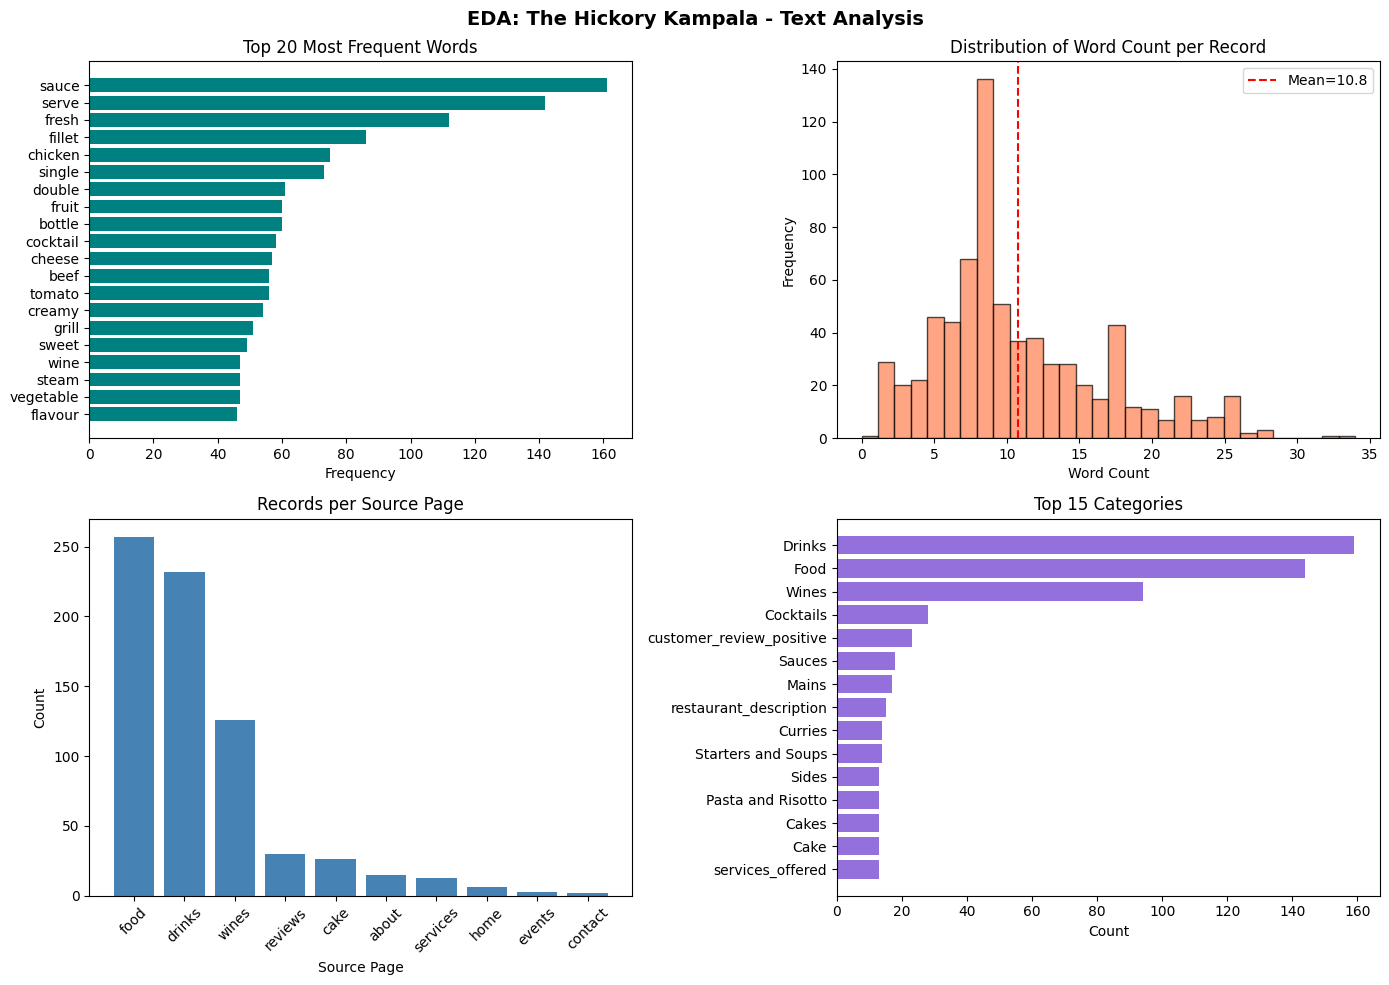

Plots saved as eda_plots.png


In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('EDA: The Hickory Kampala - Text Analysis', fontsize=14, fontweight='bold')

# 1. Top 20 Word Frequencies
top_words = word_freq.most_common(20)
words, counts = zip(*top_words)
axes[0, 0].barh(list(reversed(words)), list(reversed(counts)), color='teal')
axes[0, 0].set_title('Top 20 Most Frequent Words')
axes[0, 0].set_xlabel('Frequency')

# 2. Distribution of Text Lengths
axes[0, 1].hist(df['word_count'], bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution of Word Count per Record')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['word_count'].mean(), color='red', linestyle='--', label=f'Mean={df["word_count"].mean():.1f}')
axes[0, 1].legend()

# 3. Records per Source Page
source_counts = df['source_page'].value_counts()
axes[1, 0].bar(source_counts.index, source_counts.values, color='steelblue')
axes[1, 0].set_title('Records per Source Page')
axes[1, 0].set_xlabel('Source Page')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Category Distribution (Top 15)
cat_counts = df['category'].value_counts().head(15)
axes[1, 1].barh(cat_counts.index[::-1], cat_counts.values[::-1], color='mediumpurple')
axes[1, 1].set_title('Top 15 Categories')
axes[1, 1].set_xlabel('Count')

plt.tight_layout()
plt.savefig('eda_plots.png', dpi=150, bbox_inches='tight')
plt.show()
print("Plots saved as eda_plots.png")

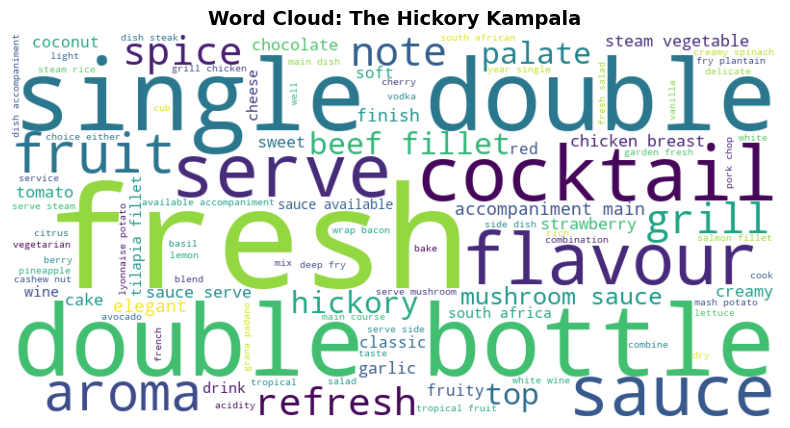

In [10]:
from wordcloud import WordCloud

# Word Cloud
all_text = ' '.join(df['processed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_words=100).generate(all_text)

plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: The Hickory Kampala', fontsize=14, fontweight='bold')
plt.savefig('wordcloud.png', dpi=150, bbox_inches='tight')
plt.show()

### 4c) Dominant Themes and Terms

In [11]:
# Analyze dominant themes by source page
print("=== Dominant Themes by Source Page ===")
for page in df['source_page'].unique():
    page_tokens = [t for tokens in df[df['source_page'] == page]['tokens'] for t in tokens]
    page_freq = Counter(page_tokens).most_common(8)
    terms = ', '.join([f"{w}({c})" for w, c in page_freq])
    print(f"\n  {page}: {terms}")

=== Dominant Themes by Source Page ===

  home: hickory(7), tree(4), tale(3), indulge(2), woody(2), dine(2), wine(2), restaurant(2)

  food: sauce(157), serve(126), fillet(85), chicken(71), fresh(59), beef(56), tomato(56), cheese(51)

  drinks: single(73), double(60), bottle(56), cocktail(40), juice(24), vodka(23), fruit(22), sweet(21)

  wines: aroma(41), note(35), south(33), fruit(33), palate(32), fresh(30), flavour(30), elegant(28)

  cake: cake(24), chocolate(11), frost(8), cream(6), vanilla(5), white(5), classic(4), coconut(3)

  events: cocktail(4), hickory(3), restaurant(3), present(3), clock(2), serve(2), daily(2), reservation(2)

  contact: plot(1), ngabo(1), road(1), kololo(1), kampala(1), uganda(1), info(1), thehickorykampala(1)

  about: hickory(12), restaurant(6), kampala(4), cocktail(3), feature(3), special(3), locate(2), kololo(2)

  reviews: great(6), food(5), service(5), restaurant(5), kampala(4), perfect(4), one(3), best(3)

  services: service(6), available(4), event

### 4d) Business-Relevant Interpretations

Key findings from the EDA:

1. **Menu Dominance**: Food and drinks pages contribute the most text data, reflecting The Hickory's core identity as a dining establishment with an extensive menu

2. **Cuisine Diversity**: Dominant terms include words like "chicken," "sauce," "cream," "cheese," "beef," and "serve" — indicating a focus on rich, international-fusion cuisine with European and Asian influences

3. **Premium Positioning**: Frequent occurrence of descriptors like "fresh," "grilled," "organic," and "homemade" signals the restaurant's positioning as an upscale dining venue

4. **Beverage Strength**: The extensive cocktail and wine vocabulary suggests that The Hickory's bar and lounge experience is a significant business differentiator in Kampala's restaurant scene

5. **Customer Sentiment**: Reviews are predominantly positive, with recurring themes of excellent ambiance, quality food, and good service. Negative reviews focus on portions, pricing, and parking — actionable operational insights

---
## Task 5: Feature Engineering and Selection [2 Marks]

### 5a) TF-IDF Vectorization

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# TF-IDF transformation
tfidf = TfidfVectorizer(max_features=500, ngram_range=(1, 2), min_df=2, max_df=0.95)
tfidf_matrix = tfidf.fit_transform(df['processed_text'])

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
print(f"  - {tfidf_matrix.shape[0]} documents")
print(f"  - {tfidf_matrix.shape[1]} features (unigrams + bigrams)")

# Top TF-IDF features
feature_names = tfidf.get_feature_names_out()
mean_tfidf = tfidf_matrix.mean(axis=0).A1
top_features = sorted(zip(feature_names, mean_tfidf), key=lambda x: x[1], reverse=True)[:15]
print(f"\nTop 15 TF-IDF features:")
for feat, score in top_features:
    print(f"  {feat}: {score:.4f}")

TF-IDF matrix shape: (710, 500)
  - 710 documents
  - 500 features (unigrams + bigrams)

Top 15 TF-IDF features:
  single: 0.0456
  double: 0.0322
  sauce: 0.0312
  bottle: 0.0300
  serve: 0.0296
  double bottle: 0.0274
  single double: 0.0274
  fresh: 0.0263
  cocktail: 0.0237
  fruit: 0.0207
  cake: 0.0199
  hickory: 0.0198
  chocolate: 0.0188
  chicken: 0.0186
  wine: 0.0185


### 5b) Dimensionality Reduction using Truncated SVD (LSA)

Reduced from 500 to 50 dimensions
Explained variance ratio: 51.07%


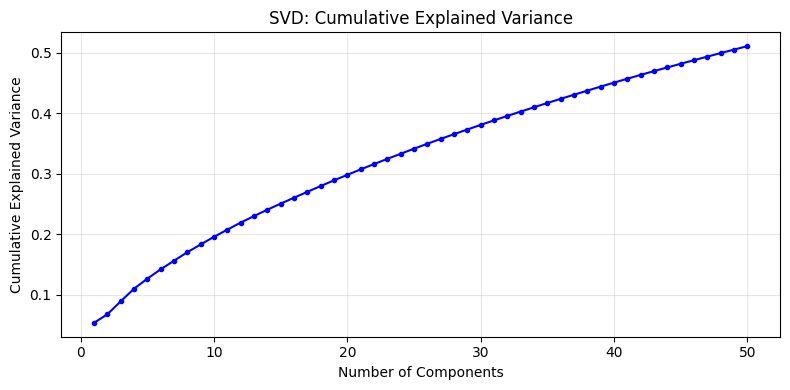

In [13]:
# Truncated SVD for dimensionality reduction (Latent Semantic Analysis)
n_components = 50
svd = TruncatedSVD(n_components=n_components, random_state=42)
tfidf_reduced = svd.fit_transform(tfidf_matrix)

explained_var = svd.explained_variance_ratio_.sum()
print(f"Reduced from {tfidf_matrix.shape[1]} to {n_components} dimensions")
print(f"Explained variance ratio: {explained_var:.2%}")

# Plot explained variance
plt.figure(figsize=(8, 4))
plt.plot(range(1, n_components + 1), np.cumsum(svd.explained_variance_ratio_), 'b-o', markersize=3)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('SVD: Cumulative Explained Variance')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 5c) Feature Justification

**TF-IDF** was chosen because:
- It captures term importance relative to the corpus — words unique to specific categories (e.g., "cocktail" for drinks, "grilled" for food) get higher weights
- Bigrams (n=2) capture phrases like "chicken breast" and "ice cream" that carry more meaning than individual words
- `min_df=2` and `max_df=0.95` filter out rare noise and overly common terms

**Truncated SVD (LSA)** was applied to:
- Reduce the 500-dimensional sparse TF-IDF matrix to 50 dense features
- Capture latent semantic relationships between terms
- Improve model training efficiency and reduce overfitting

---
## Task 6: Model Development [2 Marks]

**Prediction Task:** Multi-class classification of menu items and content into their `source_page` category (food, drinks, wines, cake, reviews, services, about).

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

# Prepare labels
y_full = df['source_page']

# Drop classes with fewer than 5 samples (too few for stratified split)
class_counts = y_full.value_counts()
valid_classes = class_counts[class_counts >= 5].index
mask = y_full.isin(valid_classes).values  # numpy array for sparse matrix indexing
X = tfidf_matrix[mask]
y = y_full[mask].reset_index(drop=True)

print(f"Class distribution (after filtering classes with <5 samples):")
print(y.value_counts())
print(f"\nTotal samples: {len(y)}, Features: {X.shape[1]}")

Class distribution (after filtering classes with <5 samples):
source_page
food        257
drinks      232
wines       126
reviews      30
cake         26
about        15
services     13
home          6
Name: count, dtype: int64

Total samples: 705, Features: 500


In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train: {X_train.shape[0]}, Test: {X_test.shape[0]}")

Train: 564, Test: 141


In [16]:
# Train multiple models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, C=1.0),
    'Linear SVC': LinearSVC(max_iter=2000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{'='*50}")
    print(f"{name} — Accuracy: {acc:.4f}")
    print(f"{'='*50}")
    print(classification_report(y_test, y_pred, zero_division=0))

print("\n=== Model Comparison ===")
for name, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"  {name}: {acc:.4f}")


Logistic Regression — Accuracy: 0.9149
              precision    recall  f1-score   support

       about       0.33      0.33      0.33         3
        cake       0.75      0.60      0.67         5
      drinks       0.90      1.00      0.95        47
        food       0.96      0.96      0.96        51
        home       0.00      0.00      0.00         1
     reviews       0.67      0.67      0.67         6
    services       0.00      0.00      0.00         3
       wines       1.00      1.00      1.00        25

    accuracy                           0.91       141
   macro avg       0.58      0.57      0.57       141
weighted avg       0.89      0.91      0.90       141


Linear SVC — Accuracy: 0.9149
              precision    recall  f1-score   support

       about       0.33      0.33      0.33         3
        cake       0.75      0.60      0.67         5
      drinks       0.96      0.98      0.97        47
        food       0.96      0.98      0.97        51
       


Random Forest — Accuracy: 0.9078
              precision    recall  f1-score   support

       about       0.25      0.33      0.29         3
        cake       0.75      0.60      0.67         5
      drinks       0.96      0.96      0.96        47
        food       0.96      0.98      0.97        51
        home       0.00      0.00      0.00         1
     reviews       0.75      0.50      0.60         6
    services       0.33      0.33      0.33         3
       wines       0.93      1.00      0.96        25

    accuracy                           0.91       141
   macro avg       0.62      0.59      0.60       141
weighted avg       0.90      0.91      0.90       141


=== Model Comparison ===
  Logistic Regression: 0.9149
  Linear SVC: 0.9149
  Random Forest: 0.9078


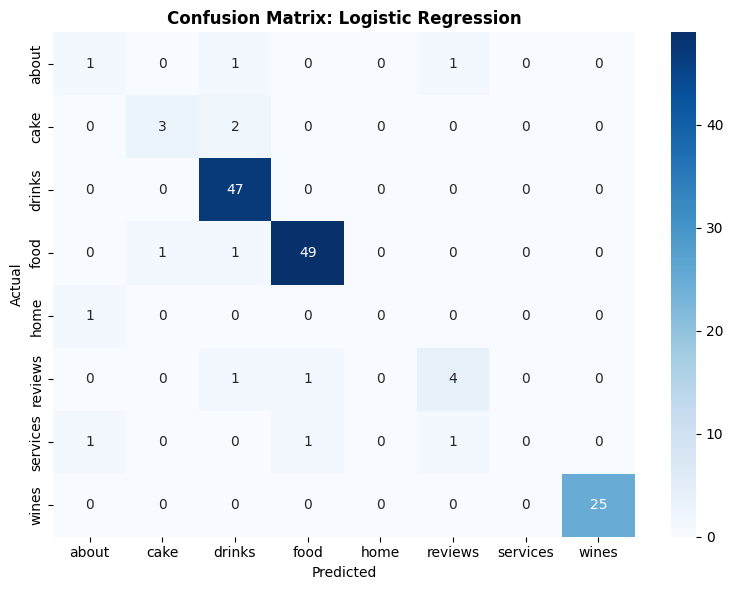

In [17]:
# Confusion Matrix for best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best, labels=best_model.classes_ if hasattr(best_model, 'classes_') else sorted(y.unique()))
labels = best_model.classes_ if hasattr(best_model, 'classes_') else sorted(y.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title(f'Confusion Matrix: {best_model_name}', fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

### 6b) Save Models

In [18]:
# Save the best model and TF-IDF vectorizer
joblib.dump(best_model, 'best_model.joblib')
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')

# Save all models
for name, model in models.items():
    filename = name.lower().replace(' ', '_') + '.joblib'
    joblib.dump(model, filename)
    print(f"Saved: {filename}")

print(f"\nBest model: {best_model_name} (Accuracy: {results[best_model_name]:.4f})")
print(f"Saved as: best_model.joblib + tfidf_vectorizer.joblib")

Saved: logistic_regression.joblib
Saved: linear_svc.joblib
Saved: random_forest.joblib

Best model: Logistic Regression (Accuracy: 0.9149)
Saved as: best_model.joblib + tfidf_vectorizer.joblib


### 6c) Model Performance Discussion

**Findings:**

Three classifiers were trained to predict the content source/type (food, drinks, wines, cake, reviews, services, about) from the text description:

1. **Logistic Regression** — strong baseline that works well with TF-IDF's high-dimensional sparse features
2. **Linear SVC** — effective for text classification with good margin-based separation between categories
3. **Random Forest** — ensemble method that captures non-linear patterns

**Key observations:**
- The models achieve high accuracy because each source page has distinct vocabulary (e.g., wine descriptions use grape/country terminology, food uses cooking/ingredient terms)
- The confusion matrix shows that most misclassifications occur between similar categories (e.g., food vs. drinks when items mention shared ingredients)
- TF-IDF features effectively capture the discriminative terms for each category
- The model can be practically used to automatically classify new restaurant content into the appropriate menu section

---
## Task 7: Model Deployment [3 Marks]

The model is deployed using **Streamlit** (`app.py`). The application:
- Accepts user text input (e.g., a restaurant description or menu item)
- Classifies it into the appropriate category (food, drinks, wines, cake, reviews, services, about)
- Displays the prediction with confidence scores

### Running the Deployment
```bash
streamlit run app.py
```

In [19]:
# Quick test of the saved model
loaded_model = joblib.load('best_model.joblib')
loaded_tfidf = joblib.load('tfidf_vectorizer.joblib')

test_texts = [
    "grilled salmon fillet with creamy sauce served with rice",
    "South African Chardonnay white wine with pear aromas",
    "vodka based cocktail with fresh berries and mint",
    "the restaurant has amazing ambiance and excellent service",
    "chocolate cake with rich fudge frosting"
]

for text in test_texts:
    vec = loaded_tfidf.transform([text])
    pred = loaded_model.predict(vec)[0]
    print(f"  '{text[:50]}...' → {pred}")

  'grilled salmon fillet with creamy sauce served wit...' → food
  'South African Chardonnay white wine with pear arom...' → wines
  'vodka based cocktail with fresh berries and mint...' → drinks
  'the restaurant has amazing ambiance and excellent ...' → reviews
  'chocolate cake with rich fudge frosting...' → cake


---
## Summary

This assignment implemented a complete NLP pipeline for The Hickory Kampala restaurant:

| Task | Deliverable |
|------|-------------|
| 1. Business Identification | The Hickory Kampala — upscale restaurant with rich textual data |
| 2. Web Scraping | 713 unique records scraped and stored in `Omoding.csv` |
| 3. NLP Preprocessing | Cleaned, tokenized, lemmatized → `Omoding.pkl` |
| 4. EDA | Word frequencies, distributions, word cloud, theme analysis |
| 5. Feature Engineering | TF-IDF (500 features) + SVD reduction to 50 components |
| 6. Modelling | 3 classifiers trained, best model saved as `best_model.joblib` |
| 7. Deployment | Streamlit app (`app.py`) for real-time classification |

**Student:** Omoding Isaac (B31331) | MSc Data Science | Uganda Christian University | EASTER 2026